In [1]:
# Handle table-like data and matrices
import numpy as np
import pandas as pd

# Helpers
import sys
from datetime import datetime
import pickle

from sklearn.model_selection import cross_val_score,StratifiedKFold
from sklearn.metrics import accuracy_score,roc_auc_score,roc_curve,log_loss
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV,cross_validate
from sklearn.metrics import classification_report
from sklearn.model_selection import LeaveOneOut,KFold,StratifiedKFold
from sklearn.decomposition import PCA,KernelPCA
import lightgbm as lgb

import sys
sys.path.insert(0,'../../') 
from helpers import *
from MAP_estimator import MAP_estimator

# Algorithm
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

# Visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

data_path = '../data/'

In [2]:
j_family = pd.read_pickle(data_path+'j_family.pkl')
train_y = pd.read_csv(data_path+'train_Y.csv')

In [4]:
j_family = pd.merge(train_y,j_family,on='sample_name')

In [5]:
j_family.head()

,sample_name,phenotype_status,TCRBJ01,TCRBJ02
0,HIP09097,0,48308,79018
1,HIP05561,0,70251,87405
2,HIP13856,1,119381,167131
3,HIP05398,0,119695,104020
4,HIP13975,1,128562,167598


In [8]:
jFamilyName = j_family.drop(['sample_name','phenotype_status'],axis=1).columns.values
jF = [i.replace('TCRBJ','') for i in jFamilyName]

In [10]:
count_l = dict()
pos_count = []
neg_count = []
for j in jFamilyName:
    count_l[j] = j_family[j].mean()
    neg_count.append(j_family[j_family['phenotype_status']==0][j].mean())
    pos_count.append(j_family[j_family['phenotype_status']==1][j].mean())
   

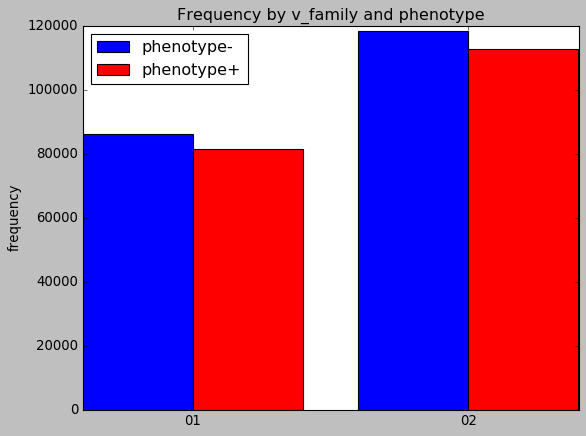

In [13]:
N = len(jFamilyName)

ind = np.arange(N)    # the x locations for the groups
width = 0.4    # the width of the bars: can also be len(x) sequence

plt.style.use('classic')
plt.figure(figsize=(8,6))
p1 = plt.bar(ind, neg_count, width,color='b')
p2 = plt.bar(ind+width, pos_count, width,color='r')

plt.ylabel('frequency')
plt.title('Frequency by v_family and phenotype')
plt.xticks(ind+width, jF)
plt.legend((p1[0], p2[0]), ('phenotype-', 'phenotype+'), loc='best')

plt.show()